# Goals

* Create a DAG of the SRAgent agent/tool hierarchy

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [2]:
# Create directed graph
G = nx.DiGraph()

In [3]:
# Define hierarchy
hierarchy = {
    'find_datasets_agent': ['esearch_scrna'],
    'entrez_convert_agent': ['esearch_agent', 'esummary_agent', 'elink_agent', 
                            'fetch_geo_record', 'fetch_ncbi_record'],
    'esearch_agent': ['esearch'],
    'esummary_agent': ['esummary'],
    'elink_agent': ['elink'],
    'sragent_agent': ['entrez_agent', 'bigquery', 'ncbi_fetch', 'sra_stat', 'fastq_dump'],
    'entrez_agent': ['esearch', 'esummary', 'elink', 'efetch'],
    'tissue_ontology_agent': ['uberon_ontology']
}

# Add edges
for parent, children in hierarchy.items():
    for child in children:
        G.add_edge(parent, child)

# Define node types
agents = {'find_datasets_agent', 'entrez_convert_agent', 'esearch_agent', 
          'esummary_agent', 'elink_agent', 'sragent_agent', 'entrez_agent', 
          'tissue_ontology_agent'}
tools = set(G.nodes()) - agents

# Layout
pos = nx.spring_layout(G, k=3, iterations=50)

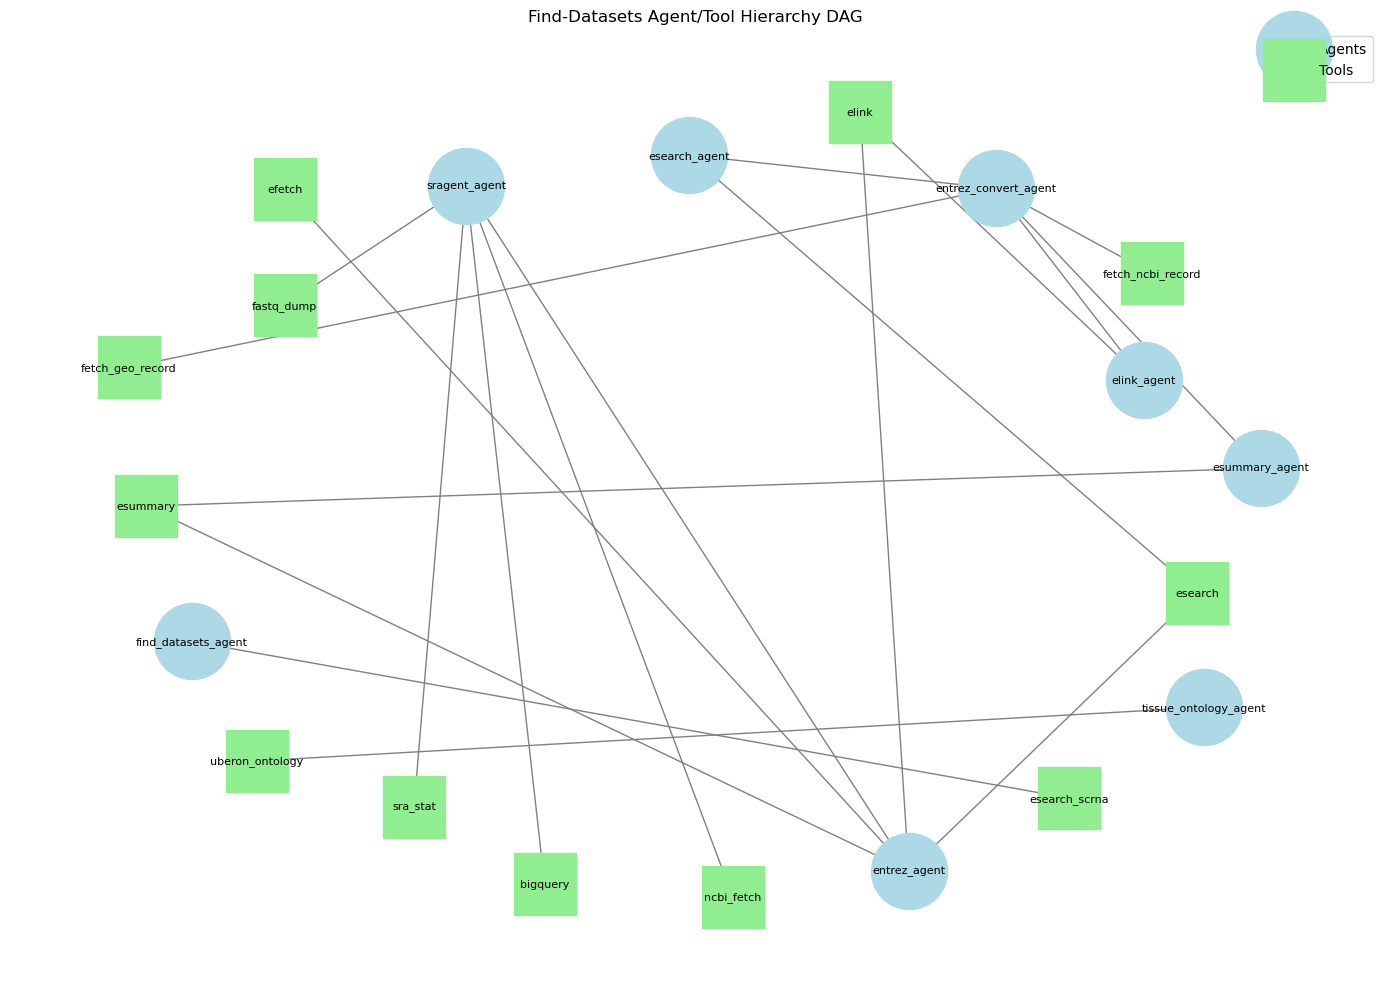

In [6]:
# Draw
plt.figure(figsize=(14, 10))
nx.draw_networkx_nodes(G, pos, nodelist=agents, node_color='lightblue', 
                       node_size=3000, node_shape='o', label='Agents')
nx.draw_networkx_nodes(G, pos, nodelist=tools, node_color='lightgreen', 
                       node_size=2000, node_shape='s', label='Tools')
nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True, 
                       arrowsize=20, arrowstyle='->')
nx.draw_networkx_labels(G, pos, font_size=8)

plt.title("Find-Datasets Agent/Tool Hierarchy DAG")
plt.legend(loc='upper right')
plt.axis('off')
plt.show()

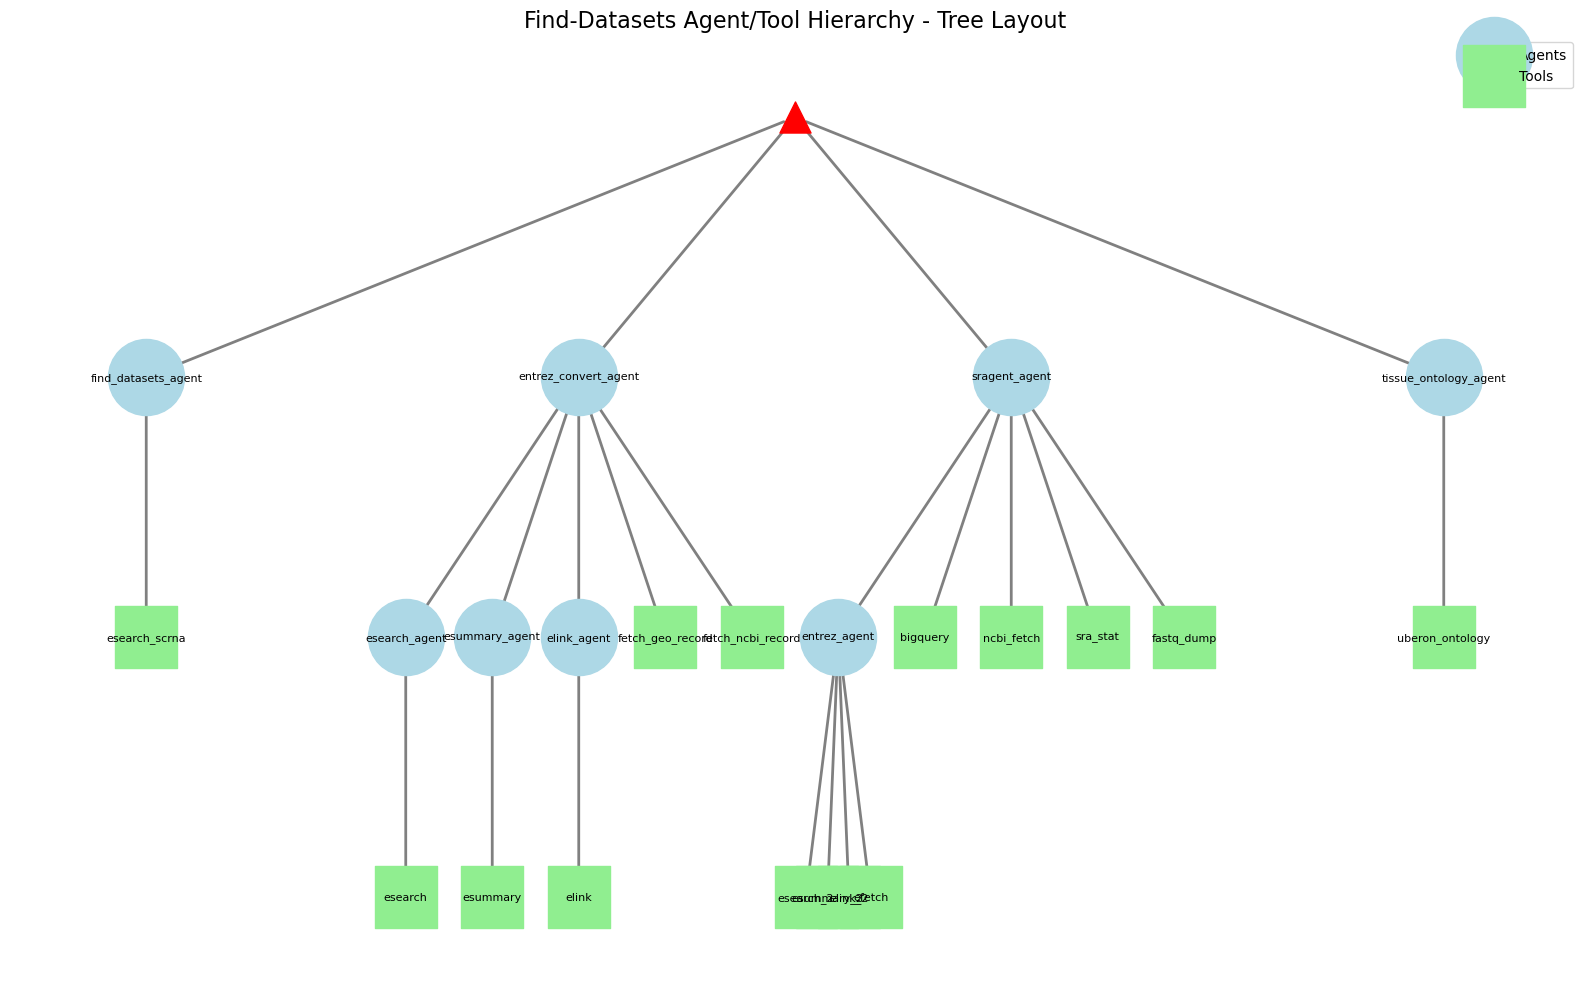

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

def hierarchy_pos(G, root=None, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5):
    '''
    Create a hierarchy pos for tree layout.
    '''
    def _hierarchy_pos(G, root, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5, pos = None, parent = None):
        if pos is None:
            pos = {root:(xcenter,vert_loc)}
        else:
            pos[root] = (xcenter, vert_loc)
        children = list(G.neighbors(root))
        if not isinstance(G, nx.DiGraph) and parent is not None:
            children.remove(parent)  
        if len(children)!=0:
            dx = width/len(children) 
            nextx = xcenter - width/2 - dx/2
            for child in children:
                nextx += dx
                pos = _hierarchy_pos(G,child, width = dx, vert_gap = vert_gap, 
                                    vert_loc = vert_loc-vert_gap, xcenter=nextx,
                                    pos=pos, parent = root)
        return pos
    return _hierarchy_pos(G, root, width, vert_gap, vert_loc, xcenter)

# Create directed graph
G = nx.DiGraph()

# Define hierarchy with a root node to connect all top-level agents
edges = [
    # Root connections
    ('ROOT', 'find_datasets_agent'),
    ('ROOT', 'entrez_convert_agent'),
    ('ROOT', 'sragent_agent'),
    ('ROOT', 'tissue_ontology_agent'),
    
    # find_datasets_agent branch
    ('find_datasets_agent', 'esearch_scrna'),
    
    # entrez_convert_agent branch
    ('entrez_convert_agent', 'esearch_agent'),
    ('entrez_convert_agent', 'esummary_agent'),
    ('entrez_convert_agent', 'elink_agent'),
    ('entrez_convert_agent', 'fetch_geo_record'),
    ('entrez_convert_agent', 'fetch_ncbi_record'),
    ('esearch_agent', 'esearch'),
    ('esummary_agent', 'esummary'),
    ('elink_agent', 'elink'),
    
    # sragent_agent branch
    ('sragent_agent', 'entrez_agent'),
    ('sragent_agent', 'bigquery'),
    ('sragent_agent', 'ncbi_fetch'),
    ('sragent_agent', 'sra_stat'),
    ('sragent_agent', 'fastq_dump'),
    ('entrez_agent', 'esearch_2'),
    ('entrez_agent', 'esummary_2'),
    ('entrez_agent', 'elink_2'),
    ('entrez_agent', 'efetch'),
    
    # tissue_ontology_agent branch
    ('tissue_ontology_agent', 'uberon_ontology')
]

G.add_edges_from(edges)

# Define node types
agents = {'ROOT', 'find_datasets_agent', 'entrez_convert_agent', 'esearch_agent', 
          'esummary_agent', 'elink_agent', 'sragent_agent', 'entrez_agent', 
          'tissue_ontology_agent'}
tools = set(G.nodes()) - agents

# Get tree layout
pos = hierarchy_pos(G, 'ROOT')

# Draw
plt.figure(figsize=(16, 10))

# Draw nodes
nx.draw_networkx_nodes(G, pos, nodelist=['ROOT'], node_color='red', 
                       node_size=500, node_shape='^')
nx.draw_networkx_nodes(G, pos, nodelist=agents-{'ROOT'}, node_color='lightblue', 
                       node_size=3000, node_shape='o', label='Agents')
nx.draw_networkx_nodes(G, pos, nodelist=tools, node_color='lightgreen', 
                       node_size=2000, node_shape='s', label='Tools')

# Draw edges
nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True, 
                       arrowsize=20, arrowstyle='->', width=2)

# Draw labels (exclude ROOT)
labels = {node: node for node in G.nodes() if node != 'ROOT'}
nx.draw_networkx_labels(G, pos, labels, font_size=8)

plt.title("Find-Datasets Agent/Tool Hierarchy - Tree Layout", fontsize=16)
plt.legend(loc='upper right')
plt.axis('off')
plt.tight_layout()
plt.show()